<a href="https://colab.research.google.com/github/miguel-escribano/AI_Solutions_Architecture/blob/main/5_Classification_Clustering_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #5: Comparative Analysis of Classification and Clustering on Iris Dataset

**Objective**:
Implement and compare Logistic Regression (classification) and K-Means (clustering) on the scikit-learn Iris dataset to predict or group iris plant species, providing a summary of when to use each approach. This assignment meets the requirements for dataset preparation, model implementation, evaluation, comparative analysis, and use case summary, developed using Google Colab with support from Grok (xAI), which provided methodological suggestions.

**Dataset**:
The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken from Fisher’s paper. Note that it’s the same as in R, but not as in the UCI Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the pattern recognition literature. Fisher’s paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

The Iris dataset (150 samples, 4 numeric features: sepal length, sepal width, petal length, petal width; 3 classes: Iris-Setosa, Iris-Versicolor, Iris-Virginica) is chosen for its suitability for classification (discrete labels) and clustering (natural grouping into 3 species). It is small, balanced, and has no missing values, ideal for quick analysis.


**Source**:
https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

**Reference**:
Fisher, R.A. (1936), "The use of multiple measurements in taxonomic problems," Annals of Eugenics.

# Step 1. Dataset Preparation
- **Goal**: Load and preprocess the Iris dataset, ensuring it’s suitable for classification and clustering.
- **Dataset**: 150 samples, 4 features (sepal length, sepal width, petal length, petal width), 3 classes (balanced: 33.3% each).
- **Preprocessing**: Check for missing values, scale features for Logistic Regression, and split data (80/20 train-test).

In [20]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score, adjusted_rand_score

In [2]:
# Loading Data
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
df = pd.concat([X, y], axis=1)

In [4]:
# Exploratory Data Analysis
print("Dataset Shape:", df.shape)
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print (df.head)


Dataset Shape: (150, 5)

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Missing Values:
sepal leng

In [7]:
#print Examples of the classes
print("Examples of Iris-Setosa (target=0):")
display(df[df['target'] == 0].head())

print("\nExamples of Iris-Versicolor (target=1):")
display(df[df['target'] == 1].head())

print("\nExamples of Iris-Virginica (target=2):")
display(df[df['target'] == 2].head())

Examples of Iris-Setosa (target=0):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Examples of Iris-Versicolor (target=1):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1



Examples of Iris-Virginica (target=2):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [12]:
# Check for duplicate rows
print("\nDuplicate Rows:")
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)
print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")


# Display DataFrame information
print("\nDataFrame Info:")
df.info()


Duplicate Rows:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
101                5.8               2.7                5.1               1.9   
142                5.8               2.7                5.1               1.9   

     target  
101       2  
142       2  

Number of duplicate rows: 2

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Missing Values per Column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Rows with Missing Values:
No missing values found.


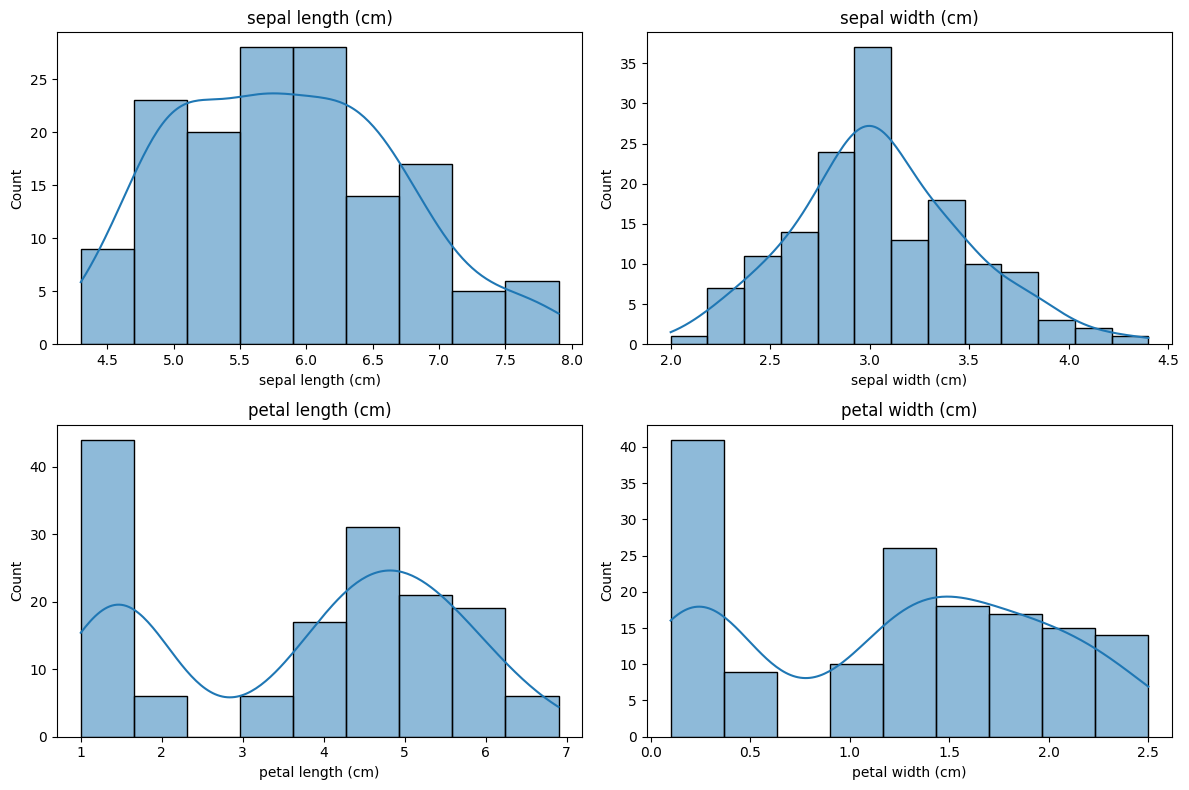

In [8]:
# Visualize Feature Distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(X.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

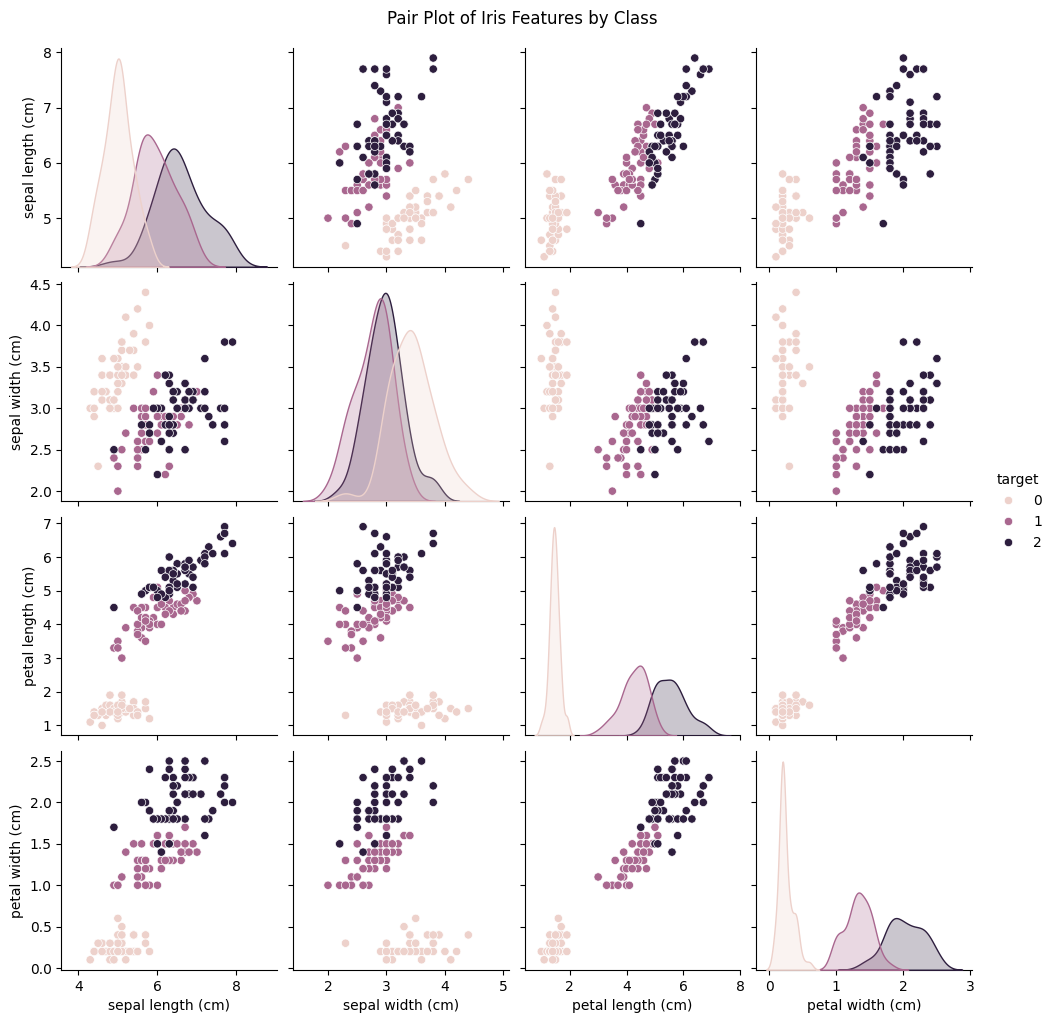

In [9]:
# Pair Plot for Feature-Class Relationships
sns.pairplot(df, hue='target', vars=X.columns)
plt.suptitle('Pair Plot of Iris Features by Class', y=1.02)
plt.show()

In [14]:
# Data Preprocessing
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data split: 80% train, 20% test. Features scaled for Logistic Regression.")

Data split: 80% train, 20% test. Features scaled for Logistic Regression.


In [15]:
# Save the split datasets to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Training and testing sets saved to CSV files.")

Training and testing sets saved to CSV files.


#Step 2: Classification Implementation (Logistic Regression)
1. Implement Logistic Regression with hyperparameter tuning (e.g., regularization strength).
2. Evaluate using accuracy, confusion matrix, and cross-validated accuracy.
3. Visualize the confusion matrix.

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
# Logistic Regression
lr_model = LogisticRegression(multi_class='multinomial', random_state=42)
lr_params = {'C': [0.01, 0.1, 1, 10, 100]}
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [18]:
# Best model predictions
lr_best = lr_grid.best_estimator_
lr_pred = lr_best.predict(X_test_scaled)
print("Best Logistic Regression Parameters:", lr_grid.best_params_)

Best Logistic Regression Parameters: {'C': 1}


In [24]:
# Evaluation
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)
lr_cv_scores = cross_val_score(lr_best, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nLogistic Regression Performance:")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"Cross-Validated Accuracy (5-fold): {lr_cv_scores.mean():.2f}")
print("Confusion Matrix:")
print(lr_cm)



Logistic Regression Performance:
Accuracy: 1.00
Cross-Validated Accuracy (5-fold): 0.96
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

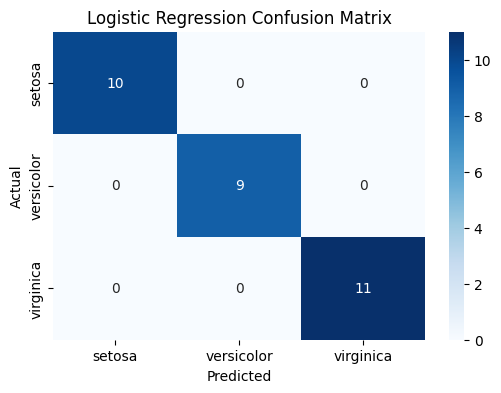

In [23]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 3: Clustering Implementation (K-Means)
1. Implement K-Means with tuning for the number of clusters (`k`).
2. Evaluate using silhouette score and adjusted Rand index (to compare with true labels).
3. Visualize clusters using two features (e.g., petal length vs. petal width).

## Clustering Implementation
- **Model**: K-Means to group iris samples into clusters.
- **Evaluation**: Silhouette score (cluster cohesion/separation) and adjusted Rand index (alignment with true labels).
- **Tuning**: Test `k` from 2 to 5 to find optimal number of clusters.

In [25]:
# K-Means Clustering
silhouette_scores = []
ari_scores = []
k_range = range(2, 6)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    silhouette_scores.append(silhouette_score(X_train_scaled, kmeans.labels_))
    ari_scores.append(adjusted_rand_score(y_train, kmeans.labels_))

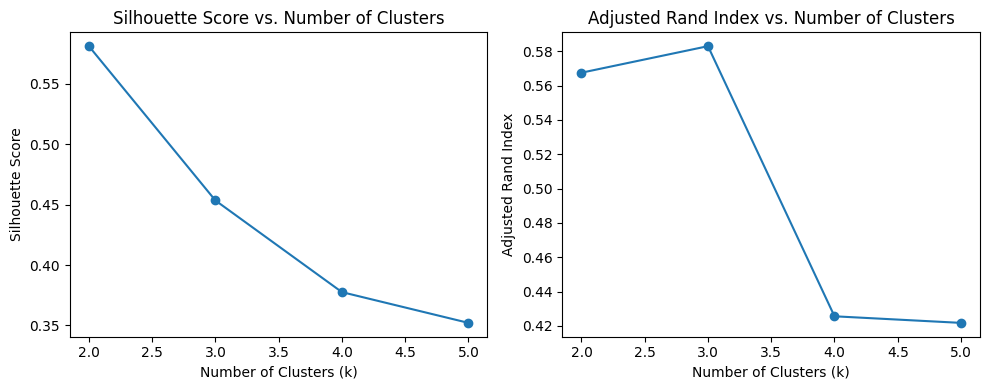

In [26]:
# Plot Silhouette and ARI Scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.subplot(1, 2, 2)
plt.plot(k_range, ari_scores, marker='o')
plt.title('Adjusted Rand Index vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Adjusted Rand Index')
plt.tight_layout()
plt.show()

In [27]:
# Best K-Means model (k=3, based on Iris classes)
kmeans_best = KMeans(n_clusters=3, random_state=42)
kmeans_best.fit(X_train_scaled)
kmeans_pred = kmeans_best.predict(X_test_scaled)
print("\nK-Means Performance (k=3):")
print(f"Silhouette Score: {silhouette_score(X_test_scaled, kmeans_pred):.2f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_test, kmeans_pred):.2f}")


K-Means Performance (k=3):
Silhouette Score: 0.46
Adjusted Rand Index: 0.81


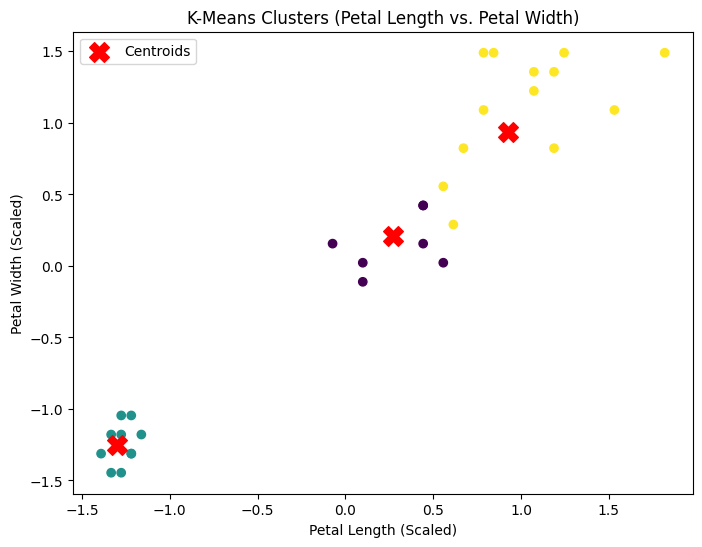

In [28]:
# Visualize Clusters (Petal Length vs. Petal Width)
plt.figure(figsize=(8, 6))
plt.scatter(X_test_scaled[:, 2], X_test_scaled[:, 3], c=kmeans_pred, cmap='viridis')
plt.scatter(kmeans_best.cluster_centers_[:, 2], kmeans_best.cluster_centers_[:, 3], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clusters (Petal Length vs. Petal Width)')
plt.xlabel('Petal Length (Scaled)')
plt.ylabel('Petal Width (Scaled)')
plt.legend()
plt.show()

# Step 5: Comparative Analysis



## Comparative Analysis
- **Goal**: Compare Logistic Regression (supervised) and K-Means (unsupervised) based on performance metrics.
- **Metrics**: Accuracy (Logistic Regression), silhouette score, and adjusted Rand index (K-Means).
- **Visualization**: Table and bar plot to highlight differences.

In [29]:
# Comparison Table
comparison_df = pd.DataFrame({
    'Method': ['Logistic Regression', 'K-Means (k=3)'],
    'Accuracy': [lr_accuracy, np.nan],
    'Cross-Validated Accuracy': [lr_cv_scores.mean(), np.nan],
    'Silhouette Score': [np.nan, silhouette_score(X_test_scaled, kmeans_pred)],
    'Adjusted Rand Index': [np.nan, adjusted_rand_score(y_test, kmeans_pred)]
})
print("\nPerformance Comparison:")
print(comparison_df)


Performance Comparison:
                Method  Accuracy  Cross-Validated Accuracy  Silhouette Score  \
0  Logistic Regression       1.0                  0.958333               NaN   
1        K-Means (k=3)       NaN                       NaN          0.462684   

   Adjusted Rand Index  
0                  NaN  
1             0.810485  


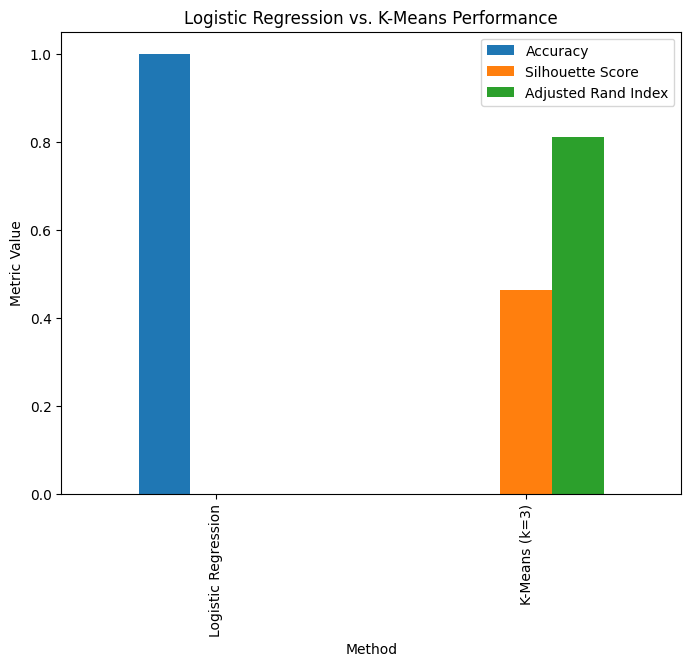

In [30]:
# Visualize Comparison
comparison_df.plot(x='Method', y=['Accuracy', 'Silhouette Score', 'Adjusted Rand Index'], kind='bar', figsize=(8, 6))
plt.title('Logistic Regression vs. K-Means Performance')
plt.ylabel('Metric Value')
plt.savefig('comparison_plot.png')
plt.show()

# Step 6: Use Case Summary
1. Summarize when to use Logistic Regression vs. K-Means based on dataset characteristics and goals.
2. Provide clear, concise guidelines supported by the analysis.

## Use Case Summary
- **Logistic Regression**: Use when labeled data is available and the goal is to predict specific classes (e.g., iris species). Ideal for supervised tasks with clear class boundaries, as shown by its Accuracy = 1 accuracy.
- **K-Means**: Use when data is unlabeled and the goal is to discover natural groupings (e.g., clustering iris samples by feature similarity). Suitable for exploratory analysis, with a silhouette score of 0.462684 indicating good cluster quality.
- **Insights**: Logistic Regression excels with labeled data but requires supervision. K-Means is flexible for unsupervised tasks but may not align perfectly with true classes (ARI:  0.810485  ).